In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import warnings
from collections import UserDict
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
%matplotlib inline
import matplotlib.dates as mpl_dates
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [ ]:
holiday = pd.read_csv ('/content/sample_data/holidays_events.csv')
holiday.head (10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [ ]:
oil = pd.read_csv ('/content/sample_data/oil.csv')
oil.head (10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [ ]:
stores = pd.read_csv ('/content/sample_data/stores.csv')
stores.head (10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
transactions = pd.read_csv ('/content/sample_data/transactions.csv')
transactions.head (10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [ ]:
holiday.isna ().sum ()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [ ]:
oil.isna ().sum ()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
# drop the missing values
oil = oil.dropna ()
oil.count ()

date          1175
dcoilwtico    1175
dtype: int64

In [ ]:
stores.isna ().sum ()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
transactions.isna ().sum ()

date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
# convert datasets to time series
holiday ['date'] = pd.to_datetime(holiday['date']) 
oil ['date'] = pd.to_datetime(oil ['date'])
transactions ['date'] = pd.to_datetime(transactions ['date']) 

In [ ]:
holiday.describe(include=[object]) 

,type,locale,locale_name,description
count,350,350,350,350
unique,6,3,24,103
top,Holiday,National,Ecuador,Carnaval
freq,221,174,174,10


In [ ]:
stores.describe(include=[object])  

,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


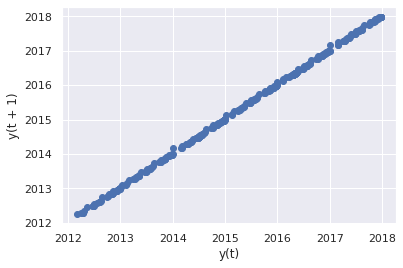

In [ ]:
pd.options.display.float_format = "{:, .2f}".format
np.set_printoptions (precision = 2)
warnings.filterwarnings ("ignore")

# import lag_plot function
from pandas.plotting import lag_plot
sns.set ()

# pass the lag argument and plot the values
# when lag = 1 the plot is essentially data [:-1] vs. data [1:]
# plot our holiday data set
lag_plot (holiday ['date'])

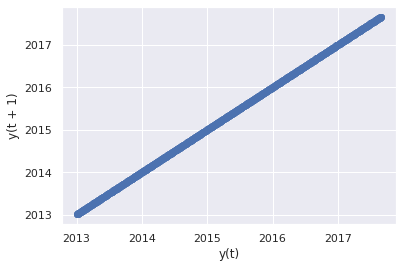

In [ ]:
# plot our oil data set
lag_plot (oil ['date'])

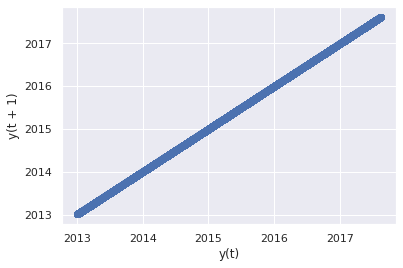

In [ ]:
# plot our transactions data set
lag_plot (transactions ['date'])

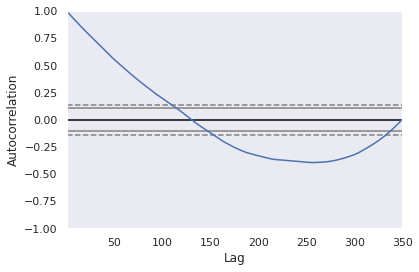

In [ ]:
# import autocorrelation plot function
from pandas.plotting import autocorrelation_plot
sns.set ()

# pass the autocorrelation argument and plot the values holiday
holiday.reset_index(inplace=True)
holiday ['date'] = holiday ['date'].apply(mpl_dates.date2num)
holiday ['date'] = holiday ['date'].astype(float)
autocorrelation_plot (holiday ['date'])

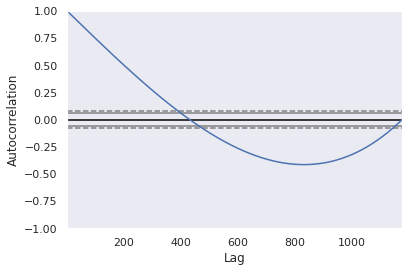

In [ ]:
# pass the autocorrelation argument and plot the values oil
oil.reset_index(inplace=True)
oil ['date'] = oil ['date'].apply(mpl_dates.date2num)
oil ['date'] = oil ['date'].astype(float)
autocorrelation_plot (oil ['date'])

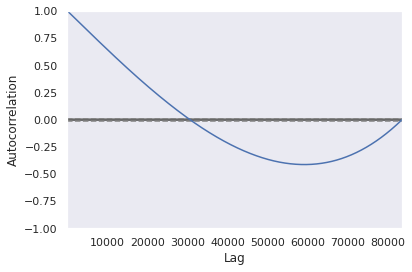

In [ ]:
# pass the autocorrelation argument and plot the values transactions
transactions.reset_index(inplace=True)
transactions ['date'] = transactions ['date'].apply(mpl_dates.date2num)
transactions ['date'] = transactions ['date'].astype(float)
autocorrelation_plot (transactions ['date'])

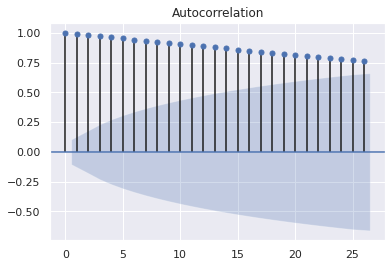

In [ ]:
# import plot_acf () function
from statsmodels.graphics.tsaplots import plot_acf

# plot the acf function on the holiday data set
plot_acf (holiday ['date'])
plt.show ()

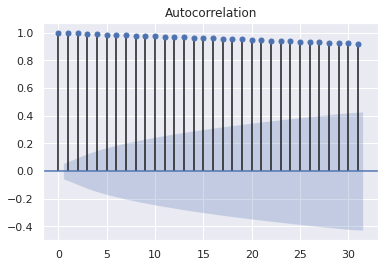

In [ ]:
# plot the acf function for oil data set
plot_acf (oil ['date'])
plt.show ()

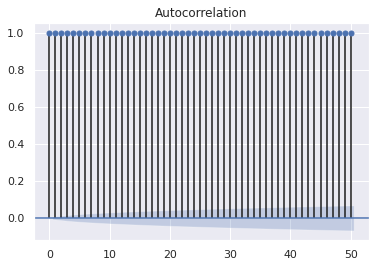

In [ ]:
# plot the acf function for transactions data set
plot_acf (transactions ['date'])
plt.show ()

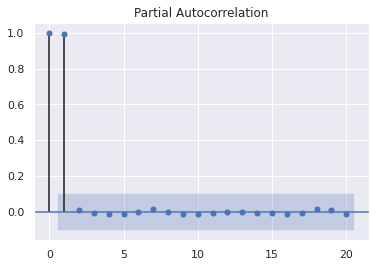

In [ ]:
# import plor_pacf () function
from statsmodels.graphics.tsaplots import plot_pacf

# plot the pacf fucntion on the holiday dataset
plot_pacf (holiday ['date'], lags = 20)
plt.show ()

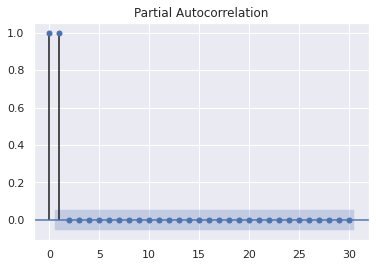

In [ ]:
# plot the pacf function on the oil dataset
plot_pacf (oil ['date'], lags = 30)
plt.show ()

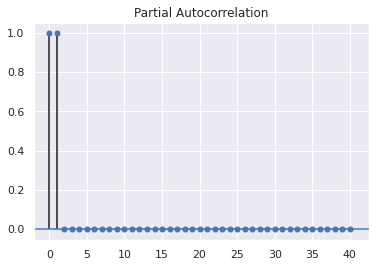

In [ ]:
# plot the pacf function on the transactions dataset
plot_pacf (transactions ['date'], lags = 40)
plt.show ()

In [ ]:
# apply AutoReg model for holiday dataset
modelH = AutoReg (oil ['date'], 1)
resultsH = modelH.fit ()
resultsH.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   date   No. Observations:                 1175
Model:                     AutoReg(1)   Log Likelihood               -1516.654
Method:               Conditional MLE   S.D. of innovations              0.881
Date:                Sat, 24 Sep 2022   AIC                             -0.249
Time:                        11:54:10   BIC                             -0.236
Sample:                             1   HQIC                            -0.244
                                 1175                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5740     38.478      0.041      0.967     -73.841      76.989
date.L1        1.0000   5.23e-05   1.91e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# apply AutoReg model for oil dataset
modelO = AutoReg (oil ['date'], 1)
resultsO = modelO.fit ()
resultsO.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   date   No. Observations:                 1175
Model:                     AutoReg(1)   Log Likelihood               -1516.654
Method:               Conditional MLE   S.D. of innovations              0.881
Date:                Sat, 24 Sep 2022   AIC                             -0.249
Time:                        11:54:29   BIC                             -0.236
Sample:                             1   HQIC                            -0.244
                                 1175                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5740     38.478      0.041      0.967     -73.841      76.989
date.L1        1.0000   5.23e-05   1.91e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# apply AutoReg model for transactions dataset
modelT = AutoReg (transactions ['date'], 1)
resultsT = modelT.fit ()
resultsT.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   date   No. Observations:                83488
Model:                     AutoReg(1)   Log Likelihood               44962.067
Method:               Conditional MLE   S.D. of innovations              0.141
Date:                Sat, 24 Sep 2022   AIC                             -3.915
Time:                        11:54:44   BIC                             -3.915
Sample:                             1   HQIC                            -3.915
                                83488                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6915      0.738      2.291      0.022       0.244       3.139
date.L1        1.0000      1e-06   9.97e+05      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

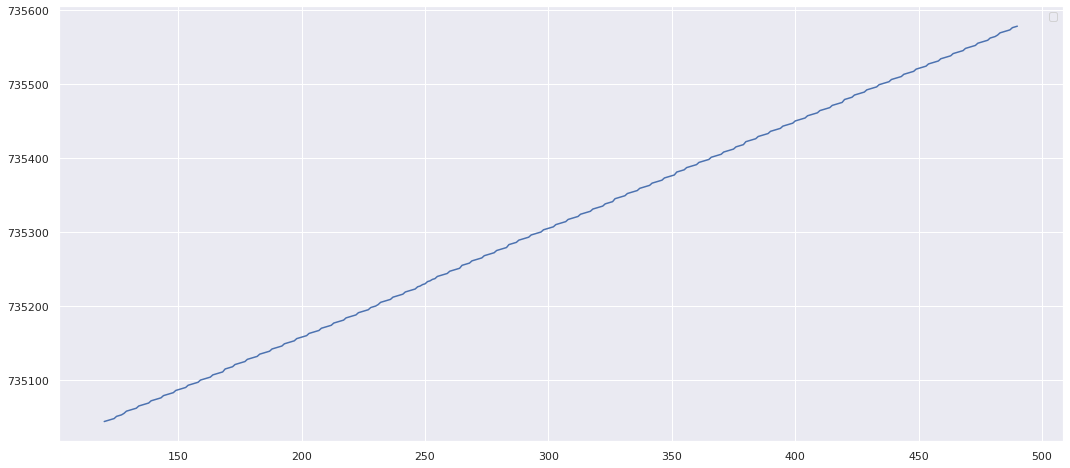

In [ ]:
# define figure style, plot package and default figure size
sns.set_style ('darkgrid')
pd.plotting.register_matplotlib_converters ()

# default figure size
sns.mpl.rc ('figure', figsize = (18, 8))

# use plot_predict and visualize forecasts for holiday dataset
figure = resultsH.plot_predict (120, 490)

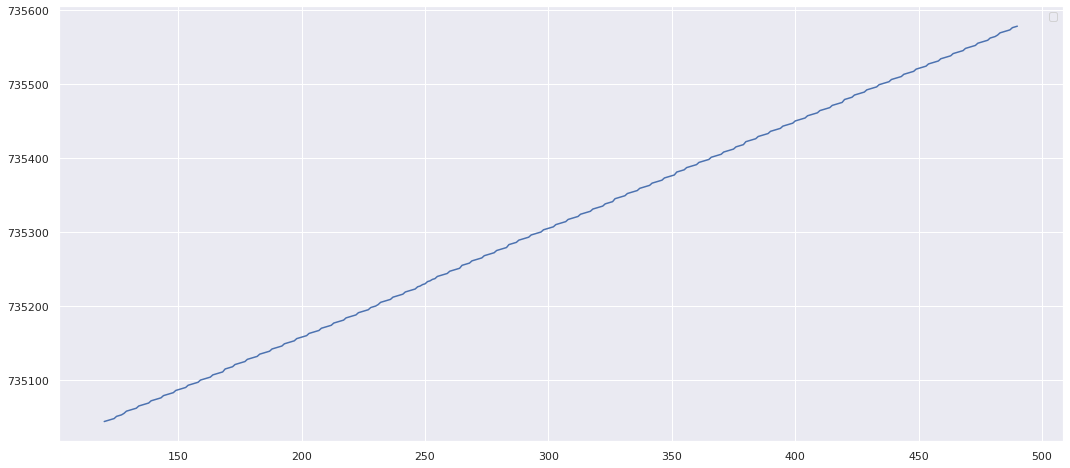

In [ ]:
# use plot_predict and visualize forecasts for oil dataset
figure = resultsO.plot_predict (120, 490)

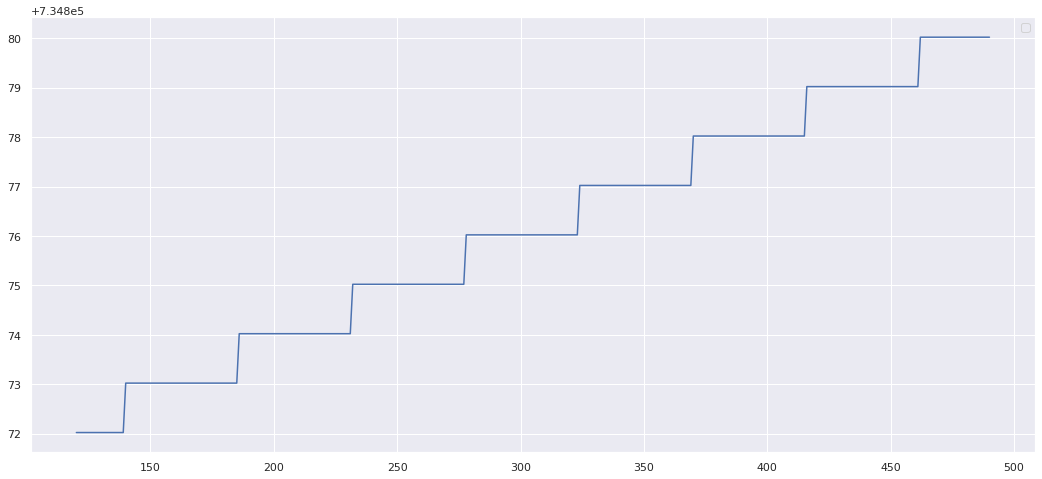

In [ ]:
# results plot_predict and visualize forecasts for transactions dataset
figure = resultsT.plot_predict (120, 490)

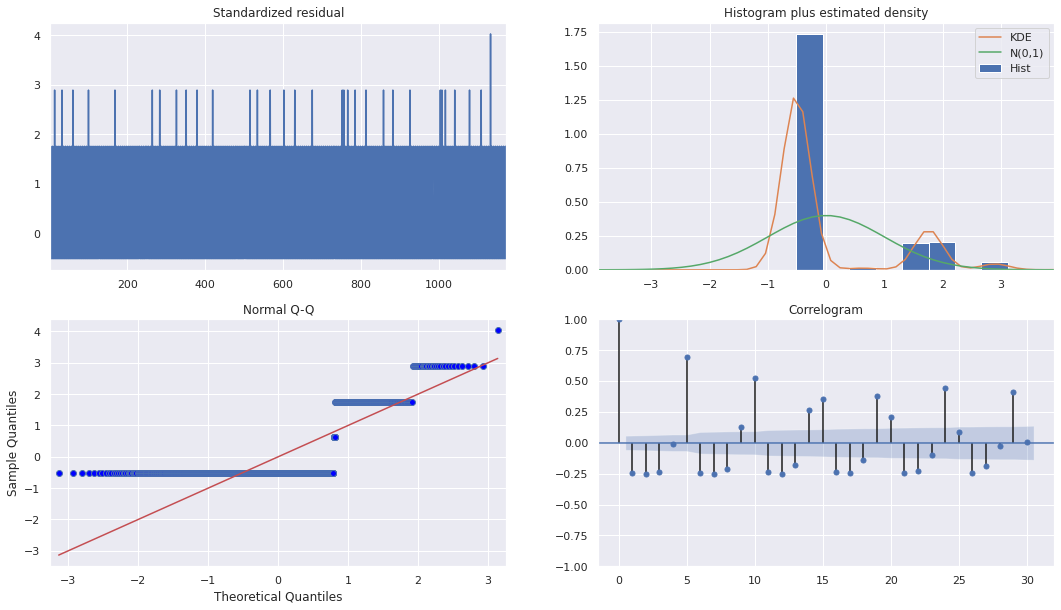

In [ ]:
# define default figure size
fig = plt.figure (figsize = (18, 10))

# use plot_predict and visualize forecasts for holiday dataset
fig = resultsH.plot_diagnostics (fig = fig, lags = 30)

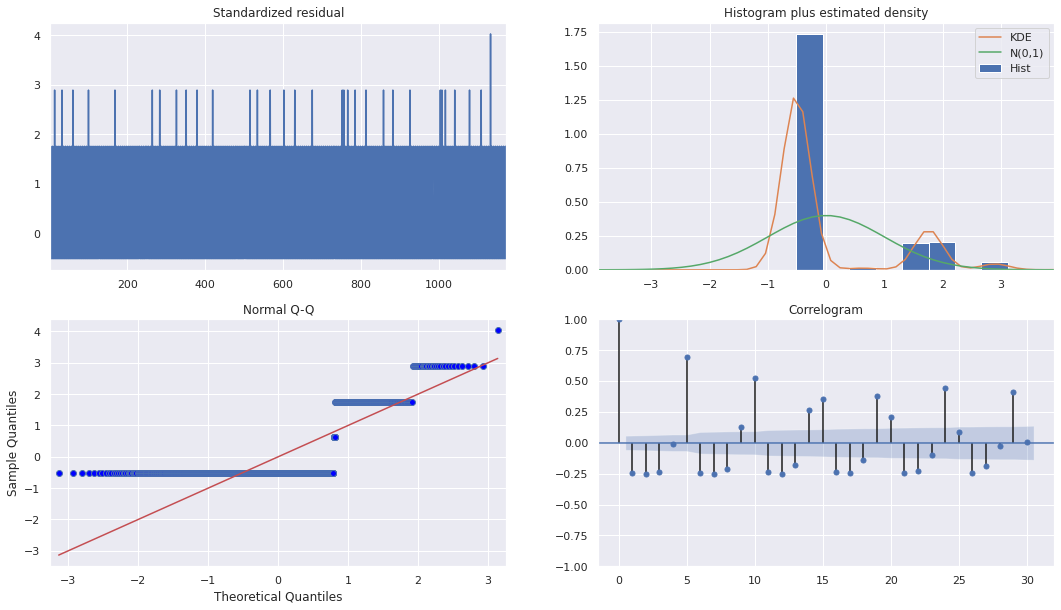

In [ ]:
# define default figure size
fig = plt.figure (figsize = (18, 10))

# use plot_predict and visualize forecasts for oil dataset
fig = resultsO.plot_diagnostics (fig = fig, lags = 30)

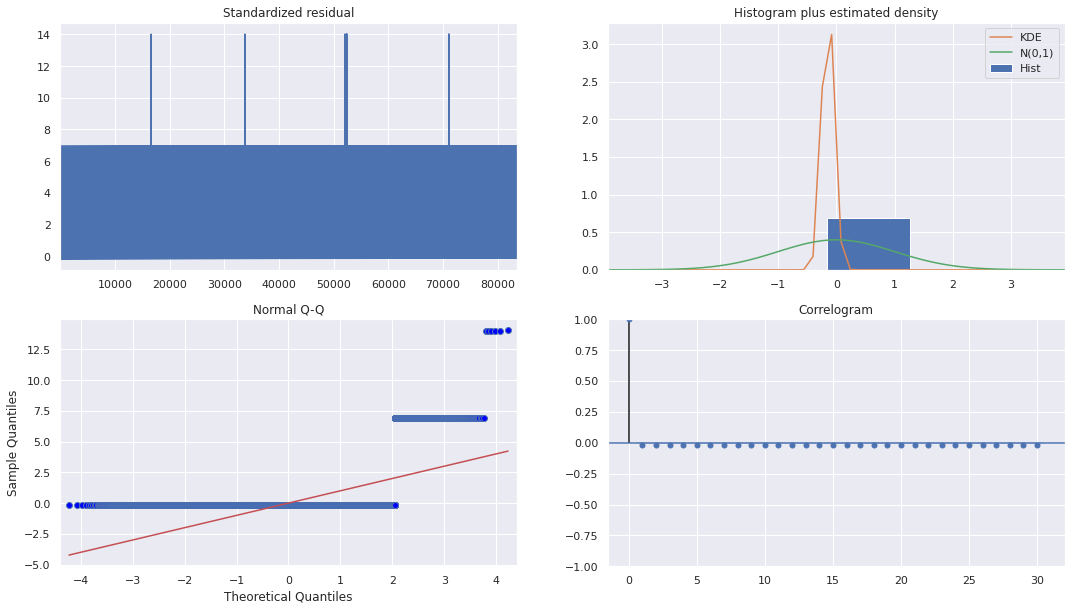

In [ ]:
# define default figure size
fig = plt.figure (figsize = (18, 10))

# use plot_predict and visualize forecasts for oil dataset
fig = resultsT.plot_diagnostics (fig = fig, lags = 30)

In [ ]:
from sklearn.model_selection import train_test_split
# create train set containing only the model features
X = oil

X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)

print ('Training data shape X: ', X_train.shape)
print ('Test data shape X: ', X_test.shape)

Training data shape X:  (787, 3)
Test data shape X:  (388, 3)


In [ ]:
# scale train data to be in range (0, 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
X_train = scaler.fit_transform (X_train)

# scale test data to be in range (0, 1)
X_test = scaler.transform (X_test)

# specify the number of steps to forecast ahead
HORIZON = 3
print ('Forecasting horizon: ', HORIZON, 'days')

Forecasting horizon:  3 days


In [ ]:
training_window = 720

history = [x for x in X_train]
history = history [(-training_window):]
predictions = list ()

for t in range (X_test.shape [0]):
    modelO = AutoReg (oil ['date'], 1)
    modelO_fit = modelH.fit ()
    yhat = modelO_fit.predict
    predictions.append (yhat)
    obs = list (X_test [t])
    # move the trainig window
    history.append (obs [0])
    history.pop (0)
    print (X_test [t])
    print (t+1, ': predicted =', yhat, 'expected =', obs)

[0.56 0.56 0.18]
1 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x7febaa2b8bd0>> expected = [0.562962962962963, 0.5631981187536326, 0.18103033220991815]
[0.36 0.36 0.78]
2 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x7febaa0e1ed0>> expected = [0.36378600823045265, 0.36331569664901053, 0.7780452575830524]
[0.16 0.16 0.91]
3 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x7febaa0cc110>> expected = [0.16296296296296295, 0.16343327454433165, 0.90912373615792]
[0.18 0.18 0.83]
4 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x7febaa0cc1d0>> expected = [0.17695473251028807, 0.1769547325102394, 0.8337746750120366]
[0.63 0.63 0.12]
5 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrap

In [ ]:
# read the data
X = pd.read_csv ('/content/sample_data/test (1).csv')
y = pd.read_csv ('/content/sample_data/train.csv')

In [ ]:
# sampling the data in X
X = X ['date'].sample(5000)

# sampling the data in y
y = y ['date'].sample (5000)

In [ ]:
# setting T - the number of lag variables 
T = 1

# setting the horizon, as we interesting in predicting next day
HORIZON = 1

In [ ]:
# convert datasets to time series
X = pd.to_datetime(X) 
y = pd.to_datetime(y)

In [ ]:
# create train set containing only the model features
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print ('Training data shape X: ', X_train.shape)
print ('Test data shape X: ', X_test.shape)
print ('Training data shape y: ', y_train.shape)
print ('Test data shape y: ', y_test.shape)

Training data shape X:  (2500,)
Test data shape X:  (2500,)
Training data shape y:  (2500,)
Test data shape y:  (2500,)


In [ ]:
# create a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.5)

print ('Validation data shape X: ', X_valid.shape)
print ('Validation data shape y: ', y_valid.shape)

Validation data shape X:  (1250,)
Validation data shape y:  (1250,)


In [ ]:
# converting data
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
X_valid = np.asarray (X_valid).astype (np.float32)
y_valid = np.asarray (y_valid).astype (np.float32)

In [ ]:
# rescale the data to 0-1 scale
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = min_max_scaler.fit_transform(X_train.reshape(-1, 1))
y_train = min_max_scaler.fit_transform(y_train.reshape(-1, 1)) 
X_test = min_max_scaler.fit_transform(X_test.reshape(-1, 1))
y_test = min_max_scaler.fit_transform(y_test.reshape(-1, 1))
X_valid = min_max_scaler.fit_transform(X_valid.reshape(-1, 1))
y_valid = min_max_scaler.fit_transform(y_valid.reshape(-1, 1))

In [ ]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], T, X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], T, y_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], T, X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], T, y_test.shape[1]))
X_valid = np.reshape(X_valid, (X_valid.shape[0], T, X_valid.shape[1]))
y_valid = np.reshape(y_valid, (y_valid.shape[0], T, y_valid.shape[1]))

In [ ]:
# number of units in the RNN layer
LATENT_DIM = 5  

# number of samples per mini-batch
BATCH_SIZE = 32

# maximum number of times the training algorithm will cycle through all samples
EPOCHS = 15

# define model and create a Sequential model
model = Sequential ()
model.add (GRU (LATENT_DIM, input_shape = (T, 1)))
model.add (Dense (HORIZON))

model.compile (optimizer = 'RMSprop', loss = 'mse')
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# specify early stop criteria
GRU_earlystop = EarlyStopping (monitor = 'val_loss', min_delta = 0, patience = 5)

# fit our model
history = model.fit (X_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_valid, y_valid),
                           callbacks = [GRU_earlystop], verbose = 1)

Epoch 1/15
40/40 [==============================] - 3s 13ms/step - loss: 0.2767 - val_loss: 0.2055
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1221
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0986 - val_loss: 0.0985
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0913 - val_loss: 0.0974
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0910 - val_loss: 0.0968
Epoch 6/15
40/40 [==============================] - 0s 2ms/step - loss: 0.0907 - val_loss: 0.0964
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.0961
Epoch 8/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.0967
Epoch 9/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.0959
Epoch 10/15
40/40 [==============================] - 0s 3ms/step - loss: 0.0903 - val_loss: 0.0959
Epoch 11/15
40/40 

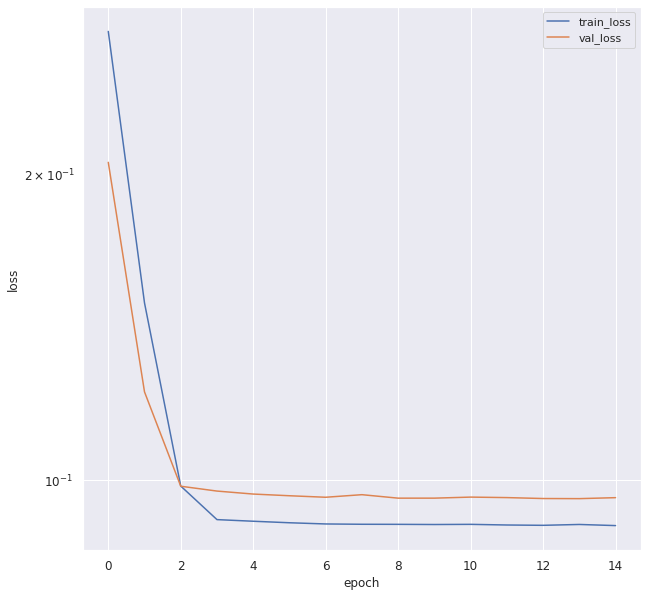

In [ ]:
# plot the epochs and train_loss and val_loss
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
# make the predictiondson the X_test and compare those predictions on the y_test
ts_predictions = model.predict (X_test)
ev_ts_data = pd.DataFrame (ts_predictions)
ev_ts_data ['prediction' ]= pd.DataFrame (ts_predictions)
ev_ts_data ['actual'] = np.transpose (y_test).ravel ()

# evaluate our model and compute MAPE (mean absolute percentage error)  
def mape (ts_predictions, actuals):
    return ((ts_predictions - actuals).abs () / actuals).mean ()

mape (ev_ts_data ['prediction'], ev_ts_data ['actual'])

inf

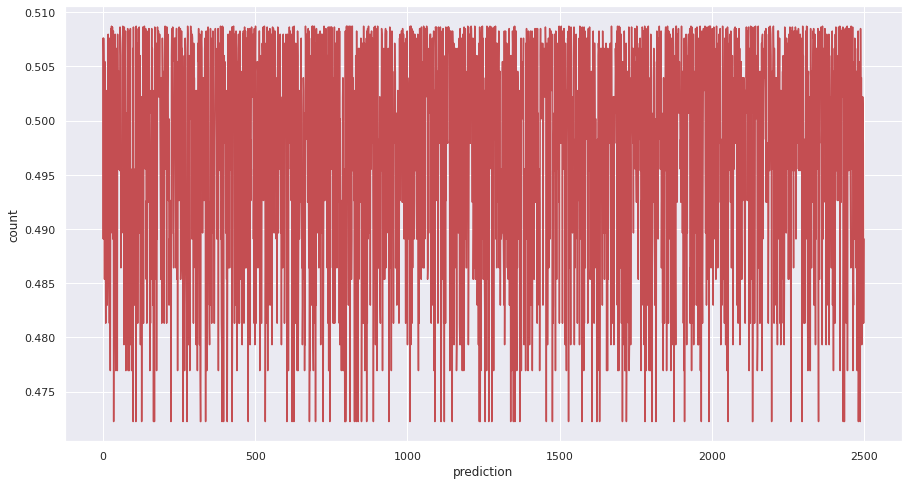

In [ ]:
# plot the count of predictions
ev_ts_data ['actual' < '0.3'].plot (x = 'prediction', style = ['r', 'b'], figsize = (15, 8))
plt.xlabel ('prediction', fontsize = 12)
plt.ylabel ('count', fontsize = 12)
plt.show ()

In [ ]:
transactions.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         83488 non-null  int64  
 1   date          83488 non-null  float64
 2   store_nbr     83488 non-null  int64  
 3   transactions  83488 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.5 MB


In [ ]:
X = transactions ['date']
y = transactions ['transactions']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)

In [ ]:
# converting data
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# rescale the data to 0-1 scale
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = min_max_scaler.fit_transform(X_train.reshape(-1, 1))
y_train = min_max_scaler.fit_transform(y_train.reshape(-1, 1)) 
X_test = min_max_scaler.fit_transform(X_test.reshape(-1, 1))
y_test = min_max_scaler.fit_transform(y_test.reshape(-1, 1))

# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))

In [ ]:
# check the data shape
print ('Training data shape X: ', X_train.shape)
print ('Test data shape X: ', X_test.shape)
print ('Training data shape y: ', y_train.shape)
print ('Test data shape y: ', y_test.shape)

Training data shape X:  (41744, 1)
Test data shape X:  (41744, 1)
Training data shape y:  (41744, 1)
Test data shape y:  (41744, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, X_test)

lr_y = y_test
lr_y_fit = lr_model.predict(X_train)
lr_y_pred = lr_model.predict(X_test)

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 0.33
